# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Anas Ghifari Kemaputra]
- **Email:** [anas123hd@gmail.com]
- **ID Dicoding:** [anasgk]

## Menentukan Pertanyaan Bisnis

- Metode pembayaran apa yang paling banyak digunakan oleh konsumen untuk melakukan pembelajaan di E-Commerce
- Penjual mana yang memiliki jumlah penjualan tertinggi 

## Import Semua Packages/Library yang Digunakan

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [27]:
order_payments_df = pd.read_csv("C:/Users/Anas G/Desktop/ANAS BELONGINGS/submission/Data/order_payments_dataset.csv", delimiter=",")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [28]:
order_items_df = pd.read_csv("C:/Users/Anas G/Desktop/ANAS BELONGINGS/submission/Data/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,21,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,20,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,20,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,20,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,19,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [29]:
order_items_df.product_id.value_counts()

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
                                   ... 
dbc42f8ad8afd0147a5a46be630781f8      1
5d86ed92606c80a89e547cdba3946812      1
0b8750fa58fefe42cf03a9e2e4b8fce6      1
a4758e74e2cdb74d0c4db83594ca14a3      1
350688d9dc1e75ff97be326363655e01      1
Name: count, Length: 32951, dtype: int64

### Assessing Data

##### Menilai tabel order_payments

In [30]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [31]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [32]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [33]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


##### Menilai tabel order_items

In [34]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [35]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [36]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  10224


In [37]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


### Cleaning Data

##### Dikarenakan dataset yang digunakan tidak memiliki null value dan tidak memiliki duplikasi maka tidak perlu dilakukan cleaning data lagi

## Exploratory Data Analysis (EDA)

### Explore order_payments

In [38]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
24480,5413211efa4372ef637627d1e59d2f82,1,credit_card,3,157.10
11253,8ba3b1fe7aa3cefdeb39bbc9a822b1cf,1,credit_card,2,292.39
36340,f0f32c83bd4335d68622f39d68724658,1,credit_card,1,14.78
60066,e84f839667bdb61865f74a90bc11ec11,1,credit_card,1,177.42
49680,9a64165cf939b42867416b35f8c13649,1,credit_card,2,388.28


In [39]:
order_payments_df.info

<bound method DataFrame.info of                                 order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value

In [40]:
order_payments_df.payment_type.value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [41]:
order_payments_df[order_payments_df['payment_type'] == 'not_defined']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0


### Explore order_items

In [42]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
35724,50de76b6e07161441556b571d4e85248,1,f422d0d9f8b5f7c27289382b14b61248,1554a68530182680ad5c8b042c3ab563,3/1/2017 16:43,66.99,17.21
39309,595a99ff17a6ca3ab990cc37da29fd2a,1,834c93d10b7198a51cb3420a91d0146f,7722b1df1b0e383e000397b2c11e3e19,5/29/2017 10:25,21.98,15.10
102121,e7cf06bc6a8ae92d204e156e702fd227,1,583f158587cdecda3e8bdea694021e39,955fee9216a65b617aa5c0531780ce60,3/19/2018 22:30,45.00,16.32
100182,e32f175b8e3e4f572ffbbf921f49f2db,1,413fa9f96b1e08ca73401f596e63dae4,2138ccb85b11a4ec1e37afbd1c8eda1f,3/29/2017 22:02,18.99,8.72
91646,cfed507ac357129f750f05a0d7d71b15,1,b6106bf3d09b8fdd33c3a9559da43145,08cdbae123ff67ca4e36d9d641ce0119,3/4/2018 22:10,460.00,237.11


In [43]:
order_items_df.info

<bound method DataFrame.info of                                 order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214             21   
1       00018f77f2f0320c557190d7a144bdd3             20   
2       000229ec398224ef6ca0657da4fc703e             20   
3       00024acbcdf0a6daa1e931b038114c75             20   
4       00042b26cf59d7ce69dfabb4e55b4fd9             19   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67a

In [44]:
order_items_df['product_id'].value_counts().head(5)

product_id
aca2eb7d00ea1a7b8ebd4e68314663af    527
99a4788cb24856965c36a24e339b6058    488
422879e10f46682990de24d770e7f83d    484
389d119b48cf3043d311335e499d9c6b    392
368c6c730842d78016ad823897a372db    388
Name: count, dtype: int64

In [45]:
top_ten_seller = order_items_df['seller_id'].value_counts().head(10) 

print(top_ten_seller)

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
955fee9216a65b617aa5c0531780ce60    1499
1025f0e2d44d7041d6cf58b6550e0bfa    1428
7c67e1448b00f6e969d365cea6b010ab    1364
ea8482cd71df3c1969d7b9473ff13abc    1203
7a67c85e85bb2ce8582c35f2203ad736    1171
Name: count, dtype: int64


### Explore order_payments dan order_items

In [46]:
payments_items = pd.merge(
    left=order_payments_df,
    right=order_items_df,
    how='inner',
    left_on="order_id",
    right_on="order_id"
)

payments_items.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,5/2/2018 22:15,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,7/2/2018 11:18,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,12/26/2017 9:52,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,12/12/2017 12:13,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,5/31/2018 16:14,113.57,14.88


## Visualization & Explanatory Analysis

### Pertanyaan 1: Metode pembayaran apa yang paling banyak digunakan oleh konsumen untuk melakukan pembelajaan di E-Commerce

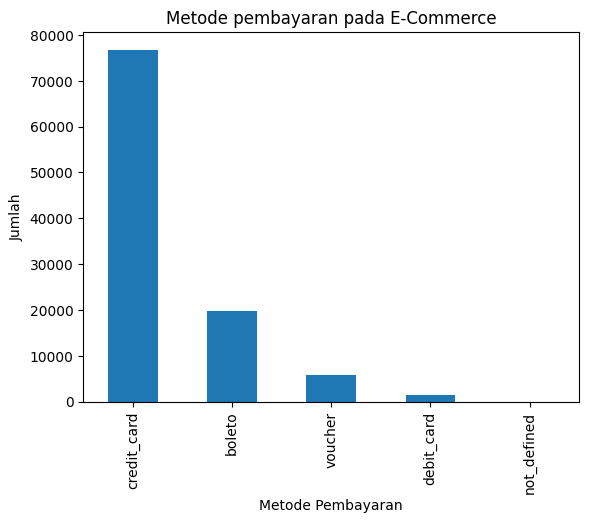

In [47]:
order_payments_df['payment_type'].value_counts().plot(kind='bar', title='Metode pembayaran pada E-Commerce')
plt.xlabel('Metode Pembayaran', fontsize=10)
plt.ylabel('Jumlah', fontsize=10)

plt.show()

### Pertanyaan 2: Penjual mana yang memiliki jumlah penjualan tertinggi 

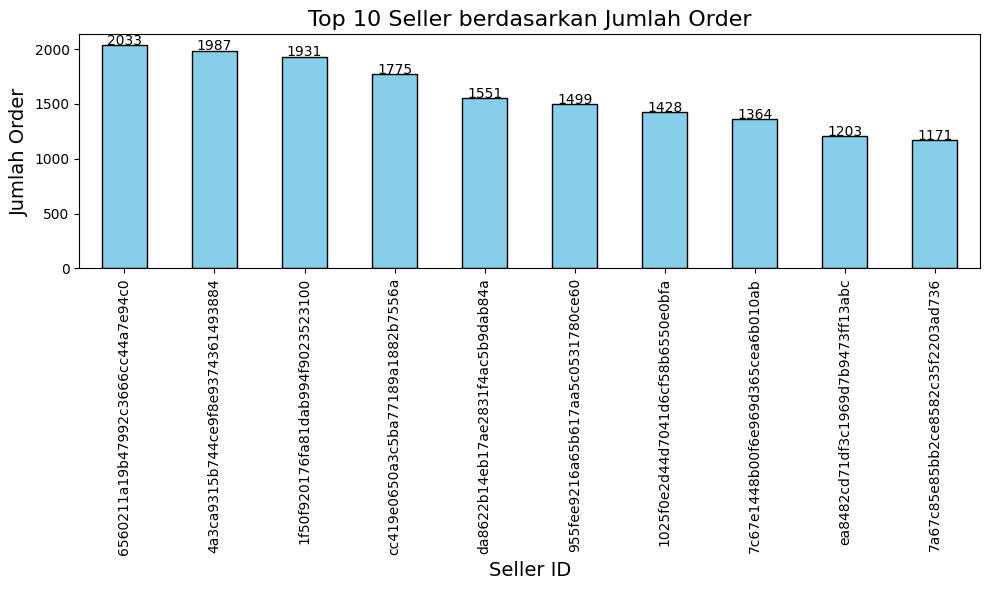

In [48]:
plt.figure(figsize=(10, 6))
top_ten_seller.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Top 10 Seller berdasarkan Jumlah Order', fontsize=16)
plt.xlabel('Seller ID', fontsize=14)
plt.ylabel('Jumlah Order', fontsize=14)

for idx, value in enumerate(top_ten_seller.values):
    plt.text(idx, value + 2, str(value), ha='center', fontsize=10)

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Conclusion

1. Mayoritas transaksi pada e-commerce menggunakan metode credit_card atau kartu kredit. Disini muncul peluang untuk optimalisasi dimana e-commerce dapat fokus pada metode pembayaran kartu kredit dengan membuat promo menarik menggunakan metode pembayaran tersebut

2. Seller dengan ID 6560211a9b47992c3666c447a9e94c0 merupakan penjual dengan jumlah order tertinggi (2.033 order), diikuti oleh seller 4a3ca9b5744cef982374361493884 (1.987 order). Untuk seller dengan penjualan tertinggi bisa memberikan penawaran khusus seperti diskon untuk pelanggan setia, dan bagi seller dengan penjualan yang lebih rendah perlu dilakukan evaluasi strategi pemasaran ataupun jumlah promosi yang lebih banyak lagi